# Machine Learning (CS535): Assignment 2
## Linear and Logistic Regression
#### Name: Umama Nasir Abbasi
#### Roll Number: 23100265

### Instructions


*   The aim of this assignment is to implement linear and logistic regression from scratch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 7th November 2022, 11:55pm on LMS.

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment2. Zip these files in a folder and name
the folder Name_RollNo_Assignment2. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing linerar regression and logistic regression models for the provided datasets from scratch. A description of the problem statement is given at the start of each part. 

Try to write modeular code as some of the functions you write for task 1 may be usable in task 2.

Have fun!

## Task 1: Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

### Part A: Implementation from scratch

Use the slides and textbook as a reference to write the gradient descent algorithm from scratch for this problem.

In [ ]:
import pandas as pd
import re
import glob 
import numpy as np 
import math 
import matplotlib as plt

In [ ]:
#reading data. 

train_X1 = pd.read_csv('Dataset/Task1/trainData.txt', sep = ' ', header = None)
train_Y1 =  pd.read_csv('Dataset/Task1/trainLabels.txt', sep = ' ', header = None)
test_X1  =  pd.read_csv('Dataset/Task1/testData.txt', sep = ' ', header = None)
test_Y1  =  pd.read_csv('Dataset/Task1/testLabels.txt', sep = ' ', header = None)

In [ ]:
# print(len(train_X))

train_X = np.array(train_X1)
train_Y = np.array(train_Y1)

In [ ]:
def square_loss(prediction, actual): 
    m = prediction.shape[0]
    square_loss = ( prediction - actual) ** 2
    return np.array(np.sum(square_loss)/(2*m))
        

In [ ]:
def testMeasures(): 
    mean = []
    std = []
    for  i in range( train_X.shape[1]):
        mean.append(np.mean(train_X[:,i]))
        std.append(np.std(train_X[:,i]))
    return np.array([mean,std])

In [ ]:
def normalize(x): 
    #mean/std for each class. 
    
    j = testMeasures()
    print(j.shape)
    mean = j[0].flatten()
    std = j[1]
    print(len(mean))
    print(x.shape)
    y = np.zeros(x.shape)
    for i in range(x.shape[1]):
        m = mean[i]
        s = std[i]
        y[:,i] = ( (x[:,i] - m) / s )
    return y  

In [ ]:
def prediction_linear(x, theta): 
    return np.dot(x,theta)


In [ ]:

def gradient_descent (predicted, alpha, theta, train_Label, train_X):
    m = train_X.shape[0]
    differential = (1/m)* np.dot(train_X.transpose(), ( predicted - train_Label) )
    tempJ = theta - (alpha * differential)
    tempJ = np.array(tempJ)
    return tempJ


In [ ]:
def Linear_Regression(train_X, train_label, epochs, alpha, theta):
    train_X = normalize(train_X)
    x_0 =np.ones((train_X.shape[0],1))
    train_X = np.append(train_X, x_0, axis=1)
    for i in range(epochs): 
        predict = prediction_linear(train_X, theta)
        cost = square_loss(predict, train_label)
        print("epoch: ", i, " cost is: ", cost)
        theta = gradient_descent(predict,alpha, theta, train_label, train_X )
    return theta


In [ ]:
theta = np.random.random(size = (train_X.shape[1]+1, 1))
updated = Linear_Regression(train_X, train_Y, 40, 0.1, theta)


(2, 13)
13
(404, 13)
epoch:  0  cost is:  [289.508191]
epoch:  1  cost is:  [220.41372074]
epoch:  2  cost is:  [178.40908848]
epoch:  3  cost is:  [146.4721651]
epoch:  4  cost is:  [120.93557173]
epoch:  5  cost is:  [100.31641344]
epoch:  6  cost is:  [83.63425287]
epoch:  7  cost is:  [70.12918749]
epoch:  8  cost is:  [59.19212422]
epoch:  9  cost is:  [50.33168712]
epoch:  10  cost is:  [43.15093205]
epoch:  11  cost is:  [37.32906914]
epoch:  12  cost is:  [32.60679387]
epoch:  13  cost is:  [28.77446325]
epoch:  14  cost is:  [25.66255522]
epoch:  15  cost is:  [23.13396755]
epoch:  16  cost is:  [21.07779985]
epoch:  17  cost is:  [19.4043318]
epoch:  18  cost is:  [18.04096676]
epoch:  19  cost is:  [16.92895436]
epoch:  20  cost is:  [16.0207421]
epoch:  21  cost is:  [15.27783482]
epoch:  22  cost is:  [14.66906432]
epoch:  23  cost is:  [14.1691904]
epoch:  24  cost is:  [13.75776963]
epoch:  25  cost is:  [13.41824048]
epoch:  26  cost is:  [13.13718331]
epoch:  27  cost 

In [ ]:
x0_test = np.ones((test_X1.shape[0],1))
test_X = np.array(test_X1) 
test_X = normalize(test_X)
test_Y = np.array(test_Y1)
test_X = np.append(test_X, x0_test, axis  =1)
# print(x0_test.shape)

(2, 13)
13
(102, 13)


In [ ]:
linear_prediction = prediction_linear(test_X, updated)
linear_cost = square_loss(linear_prediction, test_Y)
print("cost: ", linear_cost)

cost:  10.823946750475615


### Part B: Regularized Linear Regression Using Scikit-learn

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from matplotlib import pyplot as plt 



In [ ]:
test_X = np.array(test_X1) 
test_Y = np.array(test_Y1)
# print(x0_test.shape)

In [ ]:
model = LinearRegression()
model.fit(train_X1, train_Y1)
pred =model.predict(test_X)
score = mean_squared_error(test_Y, pred)
print("Score: ", score)


Score:  23.195599256422998


In [ ]:
en_model = ElasticNet()
en_model.fit(train_X1, train_Y1)
pred = en_model.predict(test_X)
score = mean_squared_error(test_Y, pred)
print("Score: ", score)


Score:  25.286946353411157


MSE -  22.573889366935223  Alpha:  [2.00e-04 5.00e-04 1.00e-04 1.00e-02 9.00e-01 2.34e-01 5.00e-04 1.00e-04
 6.00e-01]


Text(0.5, 1.0, 'Ridge regularization vs parameters')

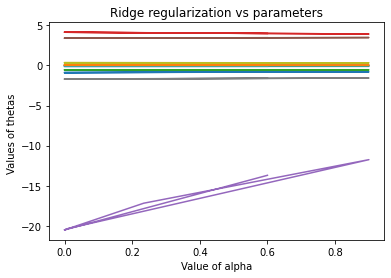

In [ ]:
alpha = np.array([0.0002, 0.0005, 0.0001, 0.01, 0.9, 0.234, 0.0005, 0.0001, 0.6])
coeffecient = []
mini = alpha[0]
score_r = 100000000
for a in alpha: 
    rid = Ridge(a)
    rid.fit(train_X1, train_Y1)
    prediction_rid = rid.predict(test_X)
    c = mean_squared_error(test_Y, prediction_rid)
    if c < score_r: 
        score_r = c
        mini = alpha
    coeffecient.append(rid.coef_.flatten())



print("MSE - ", score_r, " Alpha: ", mini)
coeffecient = np.array(coeffecient)
plt.plot(alpha, coeffecient)
plt.xlabel("Value of alpha")
plt.ylabel("Values of thetas ")
plt.title("Ridge regularization vs parameters")


## Task 2: Logistic Regression

#### Problem:
The purpose of this assignment is to get you familiar with sentiment classification. By the end of this assignment you will have your very own “Sentiment Analyzer”. You are given with Large Movie Review Dataset that contains separate labelled train and test set. Your task is to train a Logistic Regression classifier on train set and report accuracy on test set.

#### Dataset:
The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale. For example, the file [test/pos/200_8.txt] is the text for a positive-labeled test set example with unique id 200 and star rating 8/10 from IMDb.

#### Preprocessing:
In the preprocessing step you’re required to remove the stop words and punctuation marks and other unwanted characters from the reviews and convert them to lower case. You may find the string and regex module useful for this purpose. A stop word list is provided with the assignment statement.

#### Feature Extraction:
In the feature extraction step you can you’ll represent each review by the 3 features 𝑥0, 𝑥1, 𝑥2 and 1 class label 𝑦 as shown in the table below:

| Feature | Definition | Comment |
| --- | --- | --- |
| x_0 | count(positive words) ∈ review | Positive lexicon is provided |
| --- | --- | --- |
| x_2 | count(negative words) ∈ review | Negative lexicon is provided |
| --- | --- | --- |
| y | 1 if positive, 0 otherwise | Mentioned in directory name |


In [ ]:
#Pre-Processing. 
file=open('Dataset/Task2/stop_words.txt','r')
stopWords = file.read()
punct =  r'[^\w\s]'
breaks = r'<br/>'

negatives = glob.glob('Dataset/Task2/train/neg'+ '/*.txt')
final = []
positives = glob.glob('Dataset/Task2/train/pos'+ '/*.txt')
finalPos = [] 

for neg in negatives:
    f=open(neg,'r', encoding="utf-8")
    sample = f.read()
    sample = sample.lower()
    res = re.sub(breaks, '', sample) 
    res2 = re.sub(punct, '', res) 
    res2 = res2.replace(stopWords, '') 
    final.append(res2)
    f.close()
    
for pos in positives:
    f=open(pos,'r', encoding="utf-8")
    sample = f.read()
    sample = sample.lower()
    res = re.sub(breaks, '', sample) 
    res2 = re.sub(punct, '', res) 
    res2 = res2.replace(stopWords, '') 
    finalPos.append(res2)
    f.close()
    

In [ ]:
#feature extraction. 
# x_0 = 1
x_1 = [] # count of + words 
x_2 = [] # count of - words
y = [] # final label. 

file=open('Dataset/Task2/positive_words.txt','r')
positive_words = file.read()
positive_words = positive_words.split()

file=open('Dataset/Task2/negative_words.txt','r')
negative_words = file.read()
negative_words = negative_words.split()

for review in final: #for each -ve review
    positive = 0
    negative = 0
    review = review.split()
    for word in review: #words in each reviews.
        if word in positive_words: #if word exists in positive words
            positive = positive + 1
        if word in negative_words: #if word exists in negative words.
            negative = negative + 1
     
    x_1.append(positive)
    x_2.append(negative)
    y.append(0)
    
    
for review in finalPos: #for each +ve review
    positive = 0
    negative = 0
    review = review.split()
    for word in review: #words in each reviews.
        if word in positive_words: #if word exists in positive words
            positive = positive + 1
        if word in negative_words: #if word exists in negative words.
            negative = negative + 1 
    x_1.append(positive)
    x_2.append(negative)
    y.append(1)
        

In [ ]:
#test. 

negativesTest = glob.glob('Dataset/Task2/test/neg'+ '/*.txt')
negTestLabel = np.zeros(len(negativesTest))
positivesTest = glob.glob('Dataset/Task2/test/pos'+ '/*.txt')
posTestLabel = np.ones(len(positivesTest))

In [ ]:
testN = []
testP = []
for neg in negativesTest:
    f=open(neg,'r', encoding="utf-8")
    sample = f.read()
    sample = sample.lower()
    res = re.sub(breaks, '', sample) 
    res2 = re.sub(punct, '', res) 
    res2 = res2.replace(stopWords, '') 
    testN.append(res2)
    f.close()
    
for pos in positivesTest:
    f=open(pos,'r', encoding="utf-8")
    sample = f.read()
    sample = sample.lower()
    res = re.sub(breaks, '', sample) 
    res2 = re.sub(punct, '', res) 
    res2 = res2.replace(stopWords, '') 
    testP.append(res2)
    f.close()

In [ ]:
t_1 = []
t_2 = []
t_y = []
for review in testN: #for each -ve review
    positive = 0
    negative = 0
    review = review.split()
    for word in review: #words in each reviews.
        if word in positive_words: #if word exists in positive words
            positive = positive + 1
        if word in negative_words: #if word exists in negative words.
            negative = negative + 1
     
    t_1.append(positive)
    t_2.append(negative)
    t_y.append(0)
    
    
for review in testP: #for each +ve review
    positive = 0
    negative = 0
    review = review.split()
    for word in review: #words in each reviews.
        if word in positive_words: #if word exists in positive words
            positive = positive + 1
        if word in negative_words: #if word exists in negative words.
            negative = negative + 1 
    t_1.append(positive)
    t_2.append(negative)
    t_y.append(1)
        

In [ ]:
#Train: 

x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_2 = np.reshape(x_2, (x_2.shape[0],1))
X = x_1
X = np.reshape(X,(x_1.shape[0],1))
X = np.append(X, x_2, axis=1)
X = X.transpose()
temp_X = X
y = np.array(y)
temp_y = y
y = np.reshape(y, (y.shape[0],1))

#Test:
t_1 = np.array(t_1)
t_2 = np.array(t_2)
t_2 = np.reshape(t_2, (t_2.shape[0],1))
X_test = t_1
X_test = np.reshape(X_test,(t_1.shape[0],1))
X_test = np.append(X_test, t_2, axis=1)
X_test = X_test.transpose()
yTest = np.array(t_y)
yTest = np.reshape(yTest, (yTest.shape[0],1))



In [ ]:
print(X_test.shape)
print(X.shape)
print(yTest.shape)
print(y.shape)

(2, 25000)
(2, 25000)
(25000, 1)
(25000, 1)


### Part A: Implementation from scratch

#### Guidelines:
Implement the following in order to complete this part:
* Sigmoid function
* Cross-entropy loss function
* Batch Gradient Descent
* Prediction function that predict whether the label is 0 or 1 for test reviews using learned logistic regression (use the decision threshold of 0.5)
* Evaluation function that calculates classification accuracy and confusion matrix on test set (the expected accuracy on the test set is around 72%)
* Report plots with no. of iterations/ epochs on x-axis and training/ validation loss on y-axis.

In [ ]:
def sigmoid(x): 
    s = 1 / (1 + np.exp(-x))
    return s 

In [ ]:
def cross_entropy(predicted, actual): 
    predicted = predicted.transpose().flatten()
    loss = - np.average( (actual* np.log(predicted+0.000000001)) + ((1-actual)* np.log((1-predicted)+0.000000001)))
    return loss


In [ ]:

def batch_gradient_descent(alpha, X, y ,theta, predicted): 
    differential = np.dot(X, (predicted - y))
    differential = np.reshape(differential, (differential.shape[0],1))
    tempJ = theta - (alpha * differential)
    tempJ = np.array(tempJ)

    return tempJ

In [ ]:
def prediction(x,t):
    x = x.transpose()
    l = np.dot(x,t)
    return sigmoid(l)
 
 
def predict(x, t, decision_threshold):
    pred =  prediction(t,x).transpose().flatten()
    ans = np.array([1 if p >= decision_threshold else 0 for p in pred])
    return ans



In [ ]:
def normalizeLogistic(x): 
    mean = []
    std = []
    for  i in range( x.shape[1]):
        mean.append(np.mean(x[:,i]))
        std.append(np.std(x[:,i]))
    
    y = np.zeros(x.shape)
    for i in range(x.shape[1]):
        m = mean[i]
        s = std[i]
        y[:,i] = ((x[:,i] - m) / s)
    return y 

In [ ]:
def Logistic_Regression(trainData, trainLabel, epochs, learning_rate , theta, decision_threshold):
    trainData = normalizeLogistic(trainData)
    x_0 = np.ones((trainData.shape[1], 1))  
    c =[]
    trainData = np.append(trainData, x_0.transpose(), axis =0)
    for i in range (epochs): 
        h = predict(trainData, theta, decision_threshold)
        cost = cross_entropy(h, trainLabel)
        print("cost for i: ", i , " = ", cost)
        c.append(cost)
        theta = batch_gradient_descent(learning_rate, trainData, trainLabel, theta, h)
    a = np.array([theta, np.array(c)])    
    return a
    

In [ ]:

theta = np.random.random(size = (X.shape[0]+1,1))
epochs = 20
theta_training = Logistic_Regression(X, y.flatten(), epochs, 0.5, theta, 0.5)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10712\2530889262.py:12: RuntimeWarning: invalid value encountered in divide
  y[:,i] = ((x[:,i] - m) / s)


cost for i:  0  =  5.60688680411478
cost for i:  1  =  10.361632917973209
cost for i:  2  =  10.361632917973209
cost for i:  3  =  10.361632917973209
cost for i:  4  =  10.361632917973209
cost for i:  5  =  10.361632917973209
cost for i:  6  =  10.361632917973209
cost for i:  7  =  10.361632917973209
cost for i:  8  =  10.361632917973209
cost for i:  9  =  10.361632917973209
cost for i:  10  =  10.361632917973209
cost for i:  11  =  10.361632917973209
cost for i:  12  =  10.361632917973209
cost for i:  13  =  10.361632917973209
cost for i:  14  =  10.361632917973209
cost for i:  15  =  10.361632917973209
cost for i:  16  =  10.361632917973209
cost for i:  17  =  10.361632917973209
cost for i:  18  =  10.361632917973209
cost for i:  19  =  10.361632917973209


C:\Users\DELL\AppData\Local\Temp\ipykernel_10712\3361659293.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array([theta, np.array(c)])


In [ ]:

# theta_training = theta_training[:, -1]

cost = theta_training[1]
theta_training = theta_training[0]



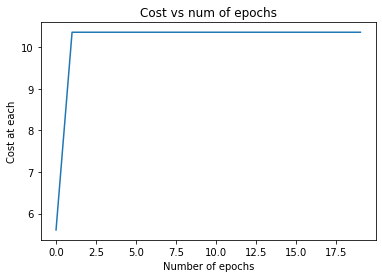

In [ ]:
numEpochs = np.arange(epochs)
plt.plot(numEpochs, cost)
plt.xlabel("Number of epochs")
plt.ylabel("Cost at each")
plt.title("Cost vs num of epochs")
plt.show()


In [ ]:
def confusion (true, predicted):
  classNum = np.unique(true) 
  s = len(classNum) #s should be equal to 10. 
  confusion = np.zeros(shape=(s,s))  #since it is multiclass, we will have s * s matrix. 
  for i in range(s):
    for j in range(s): 
      confusion[i][j] = np.sum( (predicted == classNum[j])  & (true == classNum[i]))
  return confusion 



In [ ]:
def accuracy(true, predicted): 
    ...
    conf = confusion (true, predicted)
    accuracy = []
    
    classNum = len(np.unique(true))
    for i in range(classNum):
        TP = conf[i][i]  #true positive.
        total = conf.sum() 
        TN = 0
        #for true negative
        for j in range(classNum):
            for k in range(classNum):
                if j != i and k != i:
                    if (j < j - 1):
                        j = j + 1
                    if (k < k - 1):
                        k = k + 1  
                TN = TN + conf[j][k]
    
    accuracy.append((TP + TN)/total)
    

In [ ]:
#evaluation function. 
def evaluation(theta, test_X, test_Y): 
    ...
    m = test_X.shape[0]
    predicted_labels = []
    x_0 = np.ones((test_X.shape[1], 1))  
    test_X = np.append(test_X, x_0.transpose(), axis =0)
    predicted_labels = predict(test_X, theta_training, 0.5)

    confusion_matrix = confusion(test_Y, predicted_labels)
    a = accuracy(test_Y, predicted_labels)
    eval = [confusion_matrix, a]
    return eval


    

In [ ]:
theta.shape

(3, 1)

In [ ]:
evaluating_theta = evaluation(theta_training.transpose(), X_test, yTest)



In [ ]:
evaluating_theta

[array([[12500.,     0.],
        [12500.,     0.]]),
 None]

### Part B: Use Scikit-learn

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [ ]:
#Train: 

x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_2 = np.reshape(x_2, (x_2.shape[0],1))
X = x_1
X = np.reshape(X,(x_1.shape[0],1))
X = np.append(X, x_2, axis=1)
X = X.transpose()
y = np.array(y)
# y = np.reshape(y, (y.shape[0],1))

#Test:
t_1 = np.array(t_1)
t_2 = np.array(t_2)
t_2 = np.reshape(t_2, (t_2.shape[0],1))
X_test = t_1
X_test = np.reshape(X_test,(t_1.shape[0],1))
X_test = np.append(X_test, t_2, axis=1)
X_test = X_test.transpose()
yTest = np.array(t_y)
# yTest = np.reshape(yTest, (yTest.shape[0],1))
# print(y.flatten().shape)
# print(X.shape)


In [ ]:

logistic_model = LogisticRegression()
logistic_model.fit(temp_X, temp_y)

predict_y = logistic_model.predict(X_test)
accuracy = metrics.accuracy_score(yTest,predict_y)
logistic_confusion_matrix = metrics.confusion_matrix(yTest, predict_y)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [2, 25000]

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(logistic_confusion_matrix, annot = True, fmt = ".3f", linewidth = 0.6, square = True, cmap = 'Blues_r')
plt.ylabel("Gold Labels")
plt.xlabel("Predicted Labels")
plt.title("Accuracy Score : ", str(accuracy))
